#### California Housing Prices Regression

##### 1. Understanding the Date

The dataset consists of California housing prices, and the goal is to predict the median house value (median_house_value) using other features.where the features include longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households,median_income, median_house_value, ocean_proximity

In [126]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
#loding the dataset
dataframe = pd.read_csv('housing.csv', encoding='ISO-8859-1')
dataframe.shape

(20640, 10)

In [128]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [129]:
dataframe.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [130]:
dataframe.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [131]:
#Droping the null values rows in the dataset
dataframe.dropna(inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [132]:
dataframe['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='Count'>

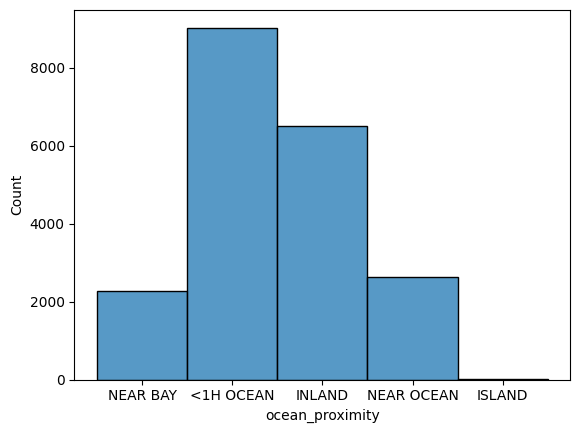

In [133]:
# Visual representation of ocean_proximity
sns.histplot(dataframe.ocean_proximity)

In [134]:
#One-Hot Encoding ocean_proximity
dataframe = pd.get_dummies(dataframe, columns=['ocean_proximity'], drop_first=True)

In [135]:
dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

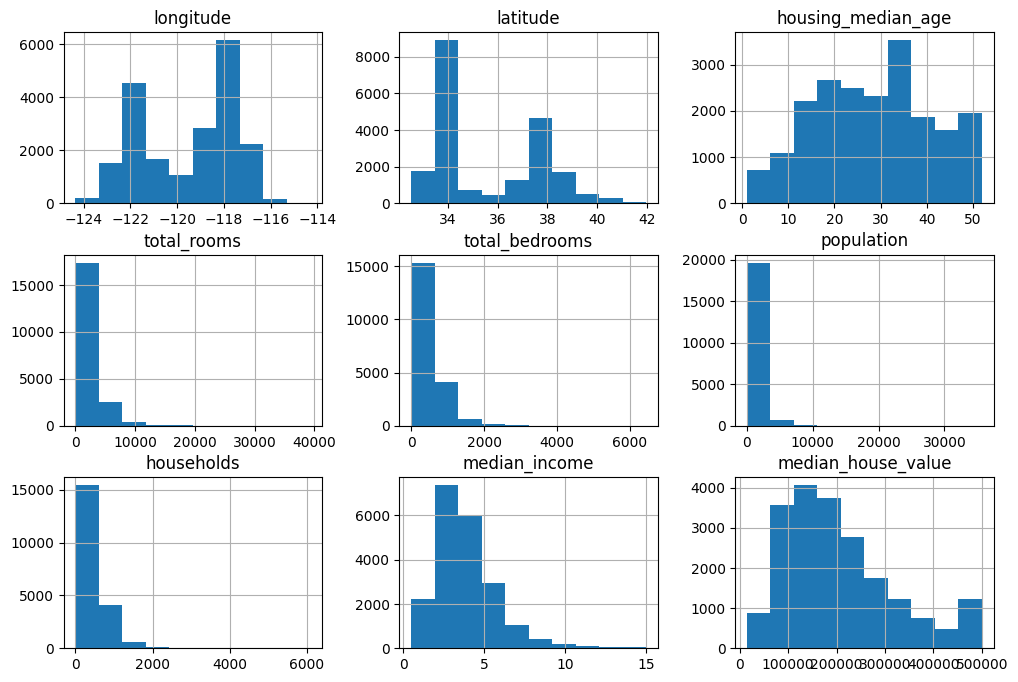

In [136]:
#visualizing the each column in dataframe
dataframe.hist(figsize=(12,8))

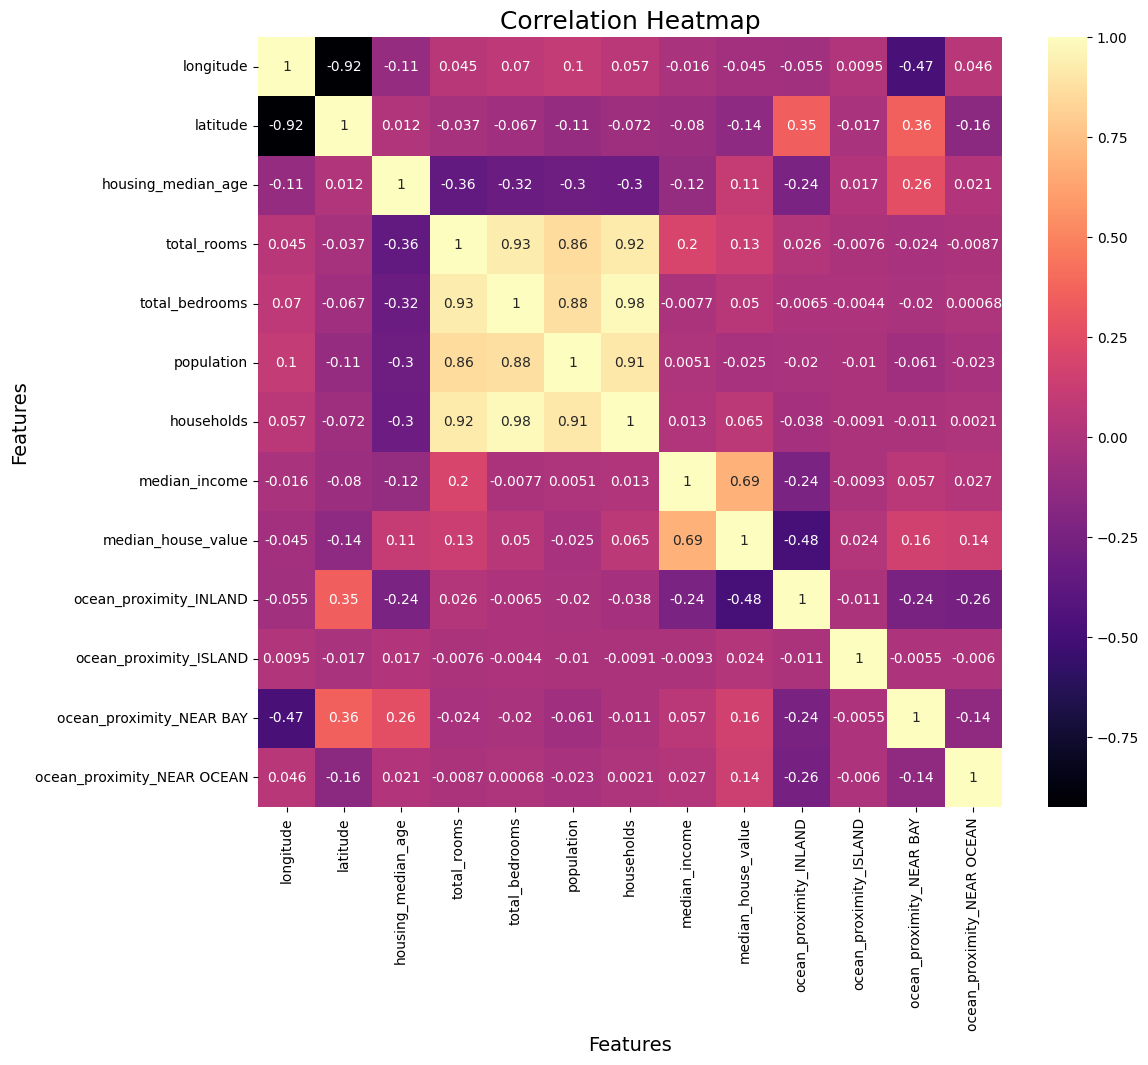

In [137]:
#visualizing the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.corr(), annot=True, cmap="magma", xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap', fontsize=18)  
plt.xlabel('Features', fontsize=14)  
plt.ylabel('Features', fontsize=14)
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

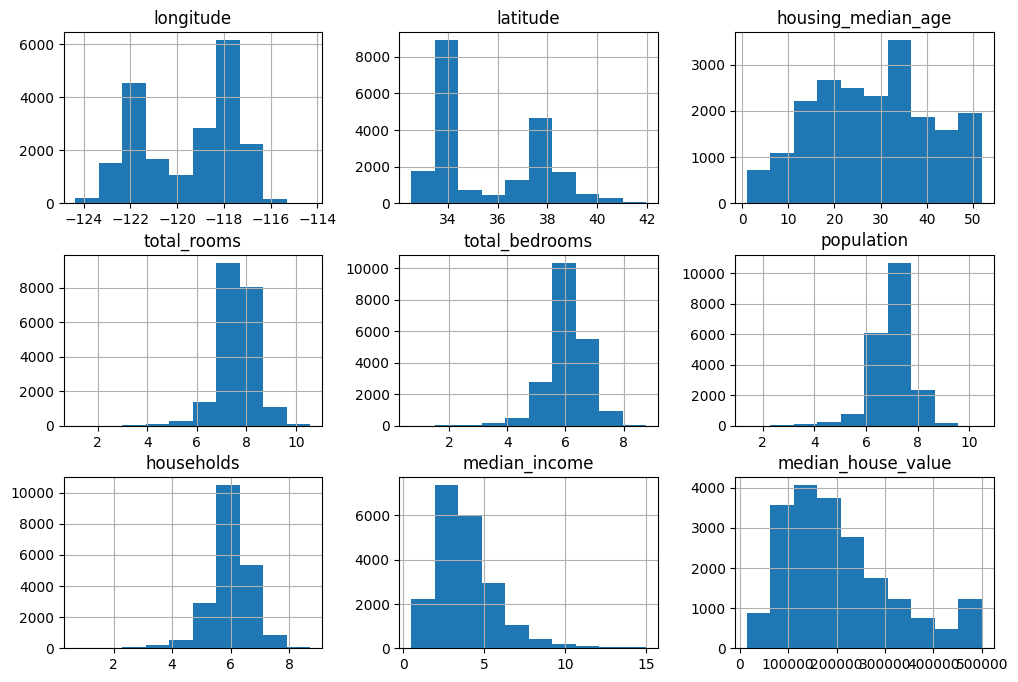

In [138]:

dataframe[ 'total_rooms'] = np.log(dataframe[ 'total_rooms'] + 1)
dataframe[ 'total_bedrooms'] = np.log(dataframe['total_bedrooms'] + 1)
dataframe[ 'population'] = np.log(dataframe['population'] + 1)
dataframe[ 'households'] = np.log(dataframe[ 'households'] + 1)

dataframe.hist(figsize=(12,8))

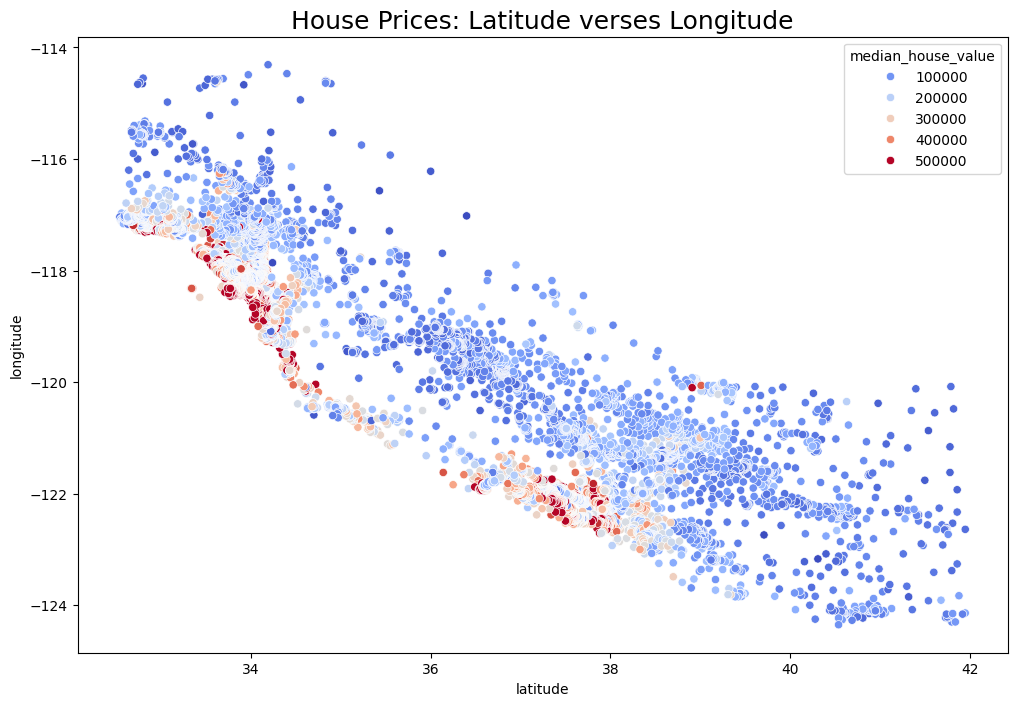

In [139]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='latitude', y='longitude', data=dataframe, hue='median_house_value', palette='coolwarm')
plt.title('House Prices: Latitude verses Longitude', fontsize=18)
plt.show()

3. Feature Selection

In [140]:
# using Recursive Feature Elimination (RFE ) method for feature selection 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = dataframe.drop('median_house_value', axis=1)
y = dataframe['median_house_value'] 

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


**Justification for choosing Recursive Feature Elimination (RFE):**
Recursive Feature Elimination (RFE) is best because it systematically selects the most important features by recursively removing the least significant ones, improving model accuracy and reducing complexity. It helps to prevent overfitting by focusing only on the most relevant features for prediction.

4. Model Selection, Model Hyperparameter tuning and Model Testing

In [141]:
#Spliting the dataframe to train and test
from sklearn.model_selection import train_test_split

X = dataframe.drop(['median_house_value'], axis=1)
y = dataframe['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_dataset = X_train.join(y_train)

In [142]:
# Working on model Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [145]:
#finding the accuracy
accuracy= rf_reg.score(X_test, y_test)
print(accuracy)

0.816492764384122


**Justification for choosing Random Forest Regressor model selection**
Random Forest Regressor is great because it builds many decision trees and combines their results, which makes predictions more accurate and reliable. It works well for complex problems where relationships between variables are non-linear. This algorithm is also less likely to overfit compared to individual decision trees, making it more generalizable to new data. It's robust to noise and outliers, meaning it handles messy data better. Plus, it doesn’t need much fine-tuning to give good results, so it's easy to use for many tasks.

In [154]:

from sklearn.model_selection import GridSearchCV
grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4]
}

In [155]:
# Perform Grid Search
grid_search = GridSearchCV(rf_reg, param_grid=grid, cv=4, scoring='neg_mean_squared_error')

In [156]:
grid_search.fit(X_train, y_train)# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [168]:
# Evaluate the model using the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [169]:
accuracy= best_model.score(X_test, y_test)
print(accuracy)

0.8186818157239588


**Justification for choosing GridSearchCV:**
GridSearchCV looks through a list of different settings for a model to find the best ones. It tests each combination using cross-validation, which helps make sure the model works well on new data. This method helps avoid overfitting and improves accuracy. It also makes it easier to try different settings without needing to do everything by hand. Overall, GridSearchCV makes the process of improving a model faster and more reliable.

5. Output Metrics

In [159]:
#Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2423052997.5771604
Mean Absolute Error: 31945.797936546776
R2 Score: 0.8186818157239588


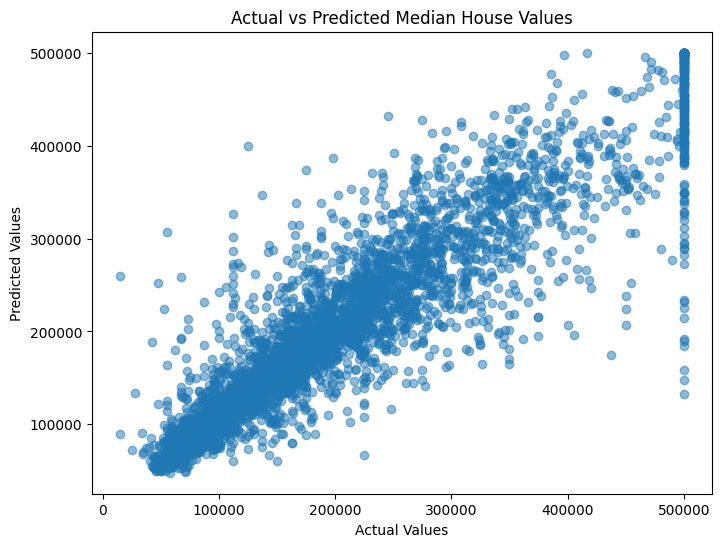

In [160]:
# Visualizing Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Values")
plt.show()